# Diabetic Prediction using SVM

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
df1=pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv")
df2=pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df3=pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

In [4]:
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
df2.rename(columns = {'Diabetes_binary':'Diabetes'}, inplace = True)
df3.rename(columns = {'Diabetes_binary':'Diabetes'}, inplace = True)
df1.rename(columns = {'Diabetes_012':'Diabetes'}, inplace = True)

In [8]:
dff=pd.concat([df1,df2],axis=0)
df=pd.concat([dff,df3],axis=0)

In [9]:
df.shape

(578052, 22)

# check null values 

<AxesSubplot:>

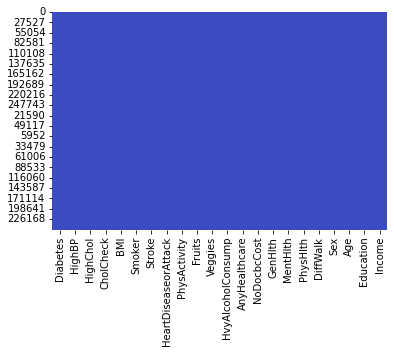

In [10]:
sns.heatmap(df.isnull(),cbar=False,cmap='coolwarm')

In [11]:
df.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,...,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000,578052.000000
mean,0.252598,0.445444,0.436544,0.964209,28.562700,0.447095,0.043212,0.100744,0.750000,0.631509,...,0.951530,0.085368,2.551222,3.254145,4.433878,0.178558,0.442379,8.099617,5.034599,6.010392
std,0.557751,0.497015,0.495957,0.185769,6.689993,0.497194,0.203335,0.300989,0.433013,0.482396,...,0.214757,0.279428,1.079378,7.509915,8.908079,0.382982,0.496669,3.035618,0.992077,2.087400
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.750000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [12]:
df['Diabetes'] = df['Diabetes'].replace([2.0],[1.0])

In [13]:
(df['Diabetes']).value_counts()

0.0    467383
1.0    110669
Name: Diabetes, dtype: int64

In [14]:
df['Diabetes'] = df1['Diabetes'].fillna(0).astype(int)


In [15]:
df1.groupby('Diabetes').mean()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes,,,,,,,,,,,,,,,,,,,,,
0.0,0.371132,0.379171,0.957104,27.742521,0.429680,0.031628,0.071833,0.779077,0.643023,0.821439,...,0.949739,0.079610,2.372391,2.944404,3.582416,0.132282,0.433985,7.786559,5.106629,6.208663
1.0,0.629022,0.620816,0.986612,30.724466,0.492766,0.057223,0.143382,0.678471,0.602246,0.768948,...,0.945152,0.129346,2.975599,4.529907,6.348305,0.277478,0.437702,9.083351,4.784496,5.351112
2.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,0.756408,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


In [16]:
x=df1.drop(columns ='Diabetes', axis=1)

In [17]:
y=df1['Diabetes']

In [18]:
x

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [19]:
y.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes, dtype: int64

# Standardising data on a range 

In [20]:
scaler=StandardScaler()

In [21]:
scaler.fit(x)
ranged_data=scaler.transform(x)

In [22]:
ranged_data

array([[ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
        -1.06559465, -1.4744874 ],
       [-0.86678537, -0.85818163, -5.07816412, ..., -0.33793279,
         0.96327159, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
        -1.06559465,  0.93963796],
       ...,
       [-0.86678537, -0.85818163,  0.19692156, ..., -1.97501498,
        -0.05116153, -1.95731247],
       [ 1.15368814, -0.85818163,  0.19692156, ..., -0.33793279,
        -0.05116153, -2.44013754],
       [ 1.15368814,  1.16525449,  0.19692156, ...,  0.31690008,
         0.96327159, -1.95731247]])

In [23]:
pd.DataFrame(ranged_data)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.153688,1.165254,0.196922,2.514516,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,...,0.226863,-0.303173,0.457294,-0.429630,0.086938,-0.449718,1.127369,-0.992766,0.963272,0.456813
253676,1.153688,1.165254,0.196922,-1.571019,-0.892119,-0.205637,-0.322458,-1.762814,-1.316872,-2.074316,...,0.226863,-0.303173,1.393207,-0.429630,-0.486592,2.223615,-0.887021,0.971733,-3.094461,-0.991662
253677,-0.866785,-0.858182,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,0.567275,0.759375,-2.074316,...,0.226863,-0.303173,-1.414532,-0.429630,-0.486592,-0.449718,-0.887021,-1.975015,-0.051162,-1.957312
253678,1.153688,-0.858182,0.196922,-0.814438,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,...,0.226863,-0.303173,0.457294,-0.429630,-0.486592,-0.449718,1.127369,-0.337933,-0.051162,-2.440138


In [24]:
x=ranged_data

# Split Train & Test dataset

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

In [26]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(202944, 21) (50736, 21) (202944,) (50736,)


# Trining the model

In [27]:
ML_Model = svm.SVC(kernel='linear')

In [28]:
ML_Model.fit(x_train, y_train)

SVC(kernel='linear')

# Model Evaluation 
Accuracy score for the x_train for y_train

In [29]:
x_train_prediction = ML_Model.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [30]:
pd.DataFrame(x_train_prediction)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
202939,0.0
202940,0.0
202941,0.0
202942,0.0


In [31]:
train_data_accuracy

0.8424097287921791

In [32]:
x_test_prediction=ML_Model.predict(x_test)

In [33]:
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [34]:
test_data_accuracy

0.8424195837275308

# Model Testing For a new Data

In [35]:
input_data = (1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0)

# make as numpy array for reshaping
array = np.asarray(input_data)

# reshape the array as we are predicting like before
input_data_reshaped =array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
prediction = ML_Model.predict(std_data)




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [36]:
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic
